## Loading Data and Data Exploration  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv', nrows=100000)

In [3]:
df_train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [4]:
df_train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [5]:
df_train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+05,100000.000000,100000.0,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.500813e+18,0.174900,14102100.0,1005.034410,0.19830,1.055730,0.199270,17682.145900,318.333960,56.818920,1964.034380,0.789350,131.734480,37874.227610,88.555670
std,5.669410e+18,0.379883,0.0,1.088741,0.40264,0.583993,0.635268,3237.735265,11.931939,36.924104,394.962696,1.223761,244.076787,48546.274316,45.482841
min,3.237563e+13,0.000000,14102100.0,1001.000000,0.00000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.183340e+18,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.074496e+19,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.457542e+19,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,20362.000000,320.000000,50.000000,2306.000000,2.000000,39.000000,100083.000000,156.000000
max,1.844670e+19,1.000000,14102100.0,1010.000000,5.00000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [6]:
df_train['click'].describe()

count    100000.000000
mean          0.174900
std           0.379883
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click, dtype: float64

## EDA and Feature Engineering

In [7]:
var = 'device_type'
data = pd.concat([df_train['click'], df_train[var]], axis=1)

1    92597
0     4212
4     2979
5      212
Name: device_type, dtype: int64

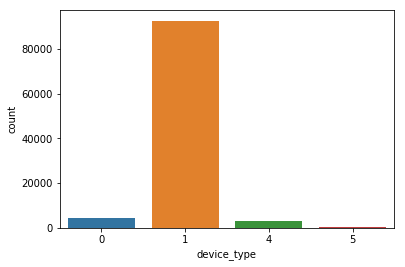

In [8]:
sns.countplot(x="device_type", data=data)
data.loc[:,'device_type'].value_counts()

In [9]:
device_type_table = pd.crosstab(index=df_train["device_type"],
                               columns=df_train["click"])
device_type_table

click,0,1
device_type,,
0,3254,958
1,76302,16295
4,2763,216
5,191,21


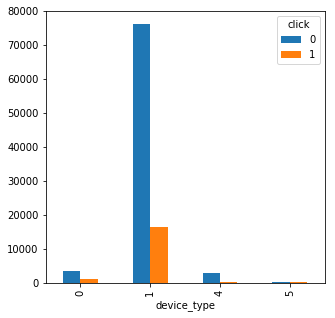

In [10]:
device_type_table.plot(kind="bar",
                      figsize=(5,5),
                      stacked=False)

In [11]:
pearson = df_train.corr(method='pearson')

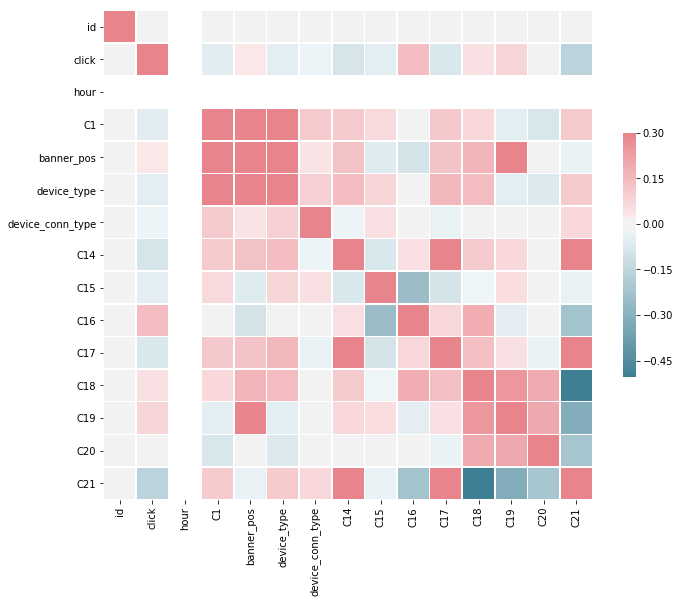

In [15]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(pearson, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
df_train = df_train.drop('id', axis=1)
df_train = df_train.drop('device_id', axis=1)
df_train = df_train.drop('device_ip', axis=1)
df_train = df_train.drop('site_id', axis=1)
df_train = df_train.drop('hour', axis=1)

In [17]:
df_train.isnull().sum().sort_values(ascending=False)

C21                 0
device_model        0
C1                  0
banner_pos          0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_type         0
C20                 0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
click               0
dtype: int64

In [18]:
print(df_train.dtypes)

click                int64
C1                   int64
banner_pos           int64
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object


In [19]:
df_train.head()

,click,C1,banner_pos,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,0,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,0,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,0,1005,1,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [20]:
df_transformed = pd.get_dummies(df_train)
df_transformed.head()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,...,device_model_ff3242b8,device_model_ff503cfe,device_model_ff607a1a,device_model_ff717dd1,device_model_ff91ea03,device_model_ffb16766,device_model_ffcd1497,device_model_ffe3ae81,device_model_ffe69079,device_model_ffeafe15
0,0,1005,0,1,2,15706,320,50,1722,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1005,0,1,0,15704,320,50,1722,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1005,0,1,0,15704,320,50,1722,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1005,0,1,0,15706,320,50,1722,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1005,1,1,0,18993,320,50,2161,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning Models and Evaluations

In [22]:
X = df_transformed.drop('click', axis = 1)
Y = df_transformed['click']

In [23]:
import sklearn.model_selection 

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80000, 4059)
(20000, 4059)
(80000,)
(20000,)


In [25]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score 

model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
y_predict = model.predict(X_test)

In [27]:
accuracy_score(Y_test, y_predict)

0.81375

In [28]:
pd.DataFrame(
    confusion_matrix(Y_test, y_predict),
    columns=['Predicted Not-clicked', 'Predicted clicked'],
    index=['Actual Not-clicked', 'Actual clicked']
)

,Predicted Not-clicked,Predicted clicked
Actual Not-clicked,15664,844
Actual clicked,2881,611


In [29]:
pos_prob = model.predict_proba(X_test)[:, 1]
print('The ROC AUC on testing set is:  {0:.3f}'.format(roc_auc_score(Y_test, pos_prob)))

The ROC AUC on testing set is:  0.654


## Decision Tree Parameter Tuning and Evaluations

In [30]:
from sklearn.model_selection import GridSearchCV 

parameters = {'max_depth':[5,10,20,50,100,None]}

decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, parameters)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'max_depth': 5}


In [31]:
decision_tree_best = grid_search.best_estimator_
pros_prob = decision_tree_best.predict_proba(X_test)[:, 1]

print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(Y_test, pos_prob)))

The ROC AUC on testing set is: 0.654


In [32]:
y_predict = decision_tree_best.predict(X_test)
accuracy_score(Y_test, y_predict)

0.82775

In [33]:
pd.DataFrame(
    confusion_matrix(Y_test, y_predict),
    columns=['Predicted Not-clicked', 'Predicted clicked'],
    index=['Actual Not-clicked', 'Actual clicked']
)

,Predicted Not-clicked,Predicted clicked
Actual Not-clicked,16192,316
Actual clicked,3129,363


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,Y_train)
y_pred=logistic_regression.predict(X_test)

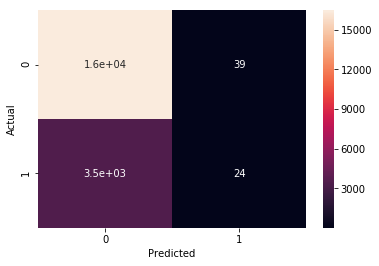

In [37]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [39]:
print('Accuracy: ', accuracy_score(Y_test, y_pred))
plt.show()

Accuracy:  0.82465


## Stochastic Gradient Descent 

In [45]:
from sklearn.linear_model import SGDClassifier

In [47]:
sgd = SGDClassifier(loss="modified_huber", shuffle=True, random_state=101)
sgd.fit(X_train, Y_train)
y_pred2 = sgd.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, y_pred2))

C:\Users\Kourosh Khedri IMSC\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy:  0.82305


## Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_pred3 = nb.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, y_pred3))

Accuracy:  0.81575
